# Black Friday Sales Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#Reading the train data
train_data=pd.read_csv('train.csv')
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#Reading the test data
test_data=pd.read_csv('test.csv')
test_data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


As the dataset provided is already split into train and test datasets we dont have to explicitly split the data.
The train dataset is ~70% here and test dataset is ~30%.

In [4]:
train_data.shape

(550068, 12)

In [5]:
test_data.shape

(233599, 11)

In [6]:
#Getting the information about the datasets
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [8]:
#Getting the descriptive analysis for train dataset
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Data Pre-Processing

In [9]:
#Checking for nulls
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
test_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Here we can see that there are missing values for Product_Category_2 and Product_Category_3

In [11]:
#Dropped User_ID and Product_ID as it had too many unique values
train_data.drop(['User_ID'],axis='columns',inplace=True)
train_data.drop(['Product_ID'],axis='columns',inplace=True)

In [13]:
#Replacing the NaN/null values with 0 in train dataset
train_data=train_data.fillna(0)
train_data[['Product_Category_2']]=train_data[['Product_Category_2']].astype(int)
train_data[['Product_Category_3']]=train_data[['Product_Category_3']].astype(int)
train_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969


In [14]:
#Replacing the NaN/null values with 0 in test dataset
test_data=test_data.drop(['User_ID'], axis=1)
test_data.drop(['Product_ID'],axis='columns',inplace=True)
test_data=test_data.fillna(0)
test_data[['Product_Category_2']]=test_data[['Product_Category_2']].astype(int)
test_data[['Product_Category_3']]=test_data[['Product_Category_3']].astype(int)
test_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11,0
1,M,26-35,17,C,0,0,3,5,0
2,F,36-45,1,B,4+,1,5,14,0
3,F,36-45,1,B,4+,1,4,9,0
4,F,26-35,1,C,1,0,4,5,12


# Explanatory Data Analysis

In [15]:
#Univariate Analysis
columns=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

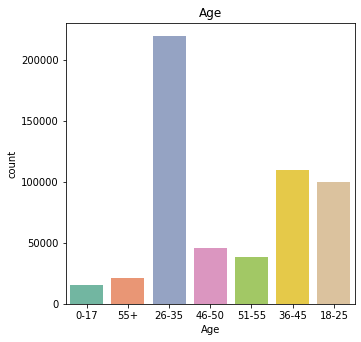

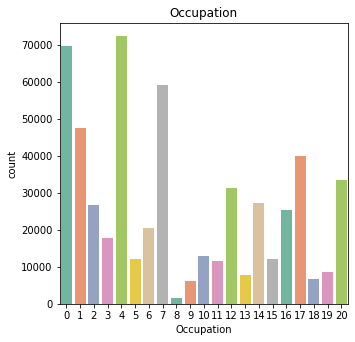

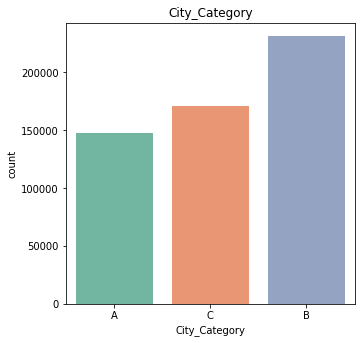

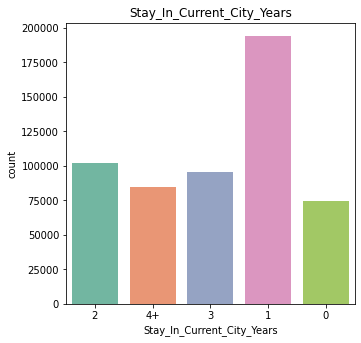

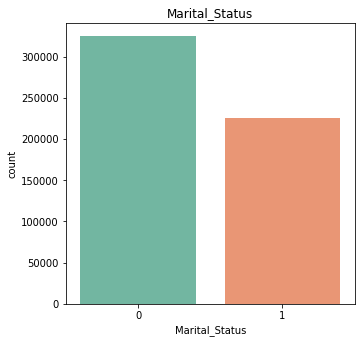

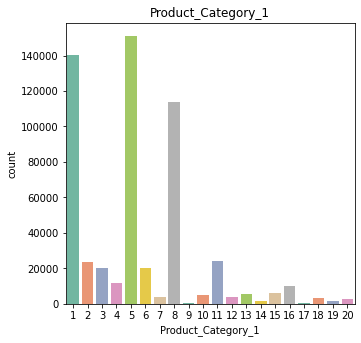

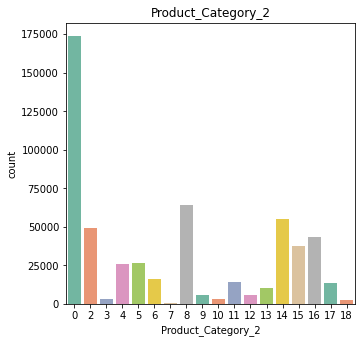

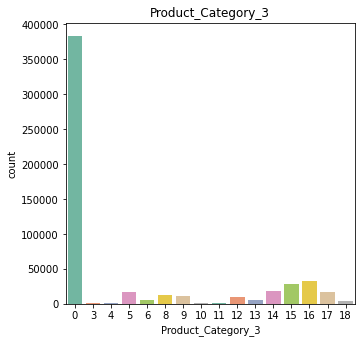

In [16]:
for i in range(1,len(columns)):
    fig=plt.figure(figsize=(30,30))
    fig.add_subplot(5,5,i)
    plt.title(columns[i])
    sns.countplot(data=train_data,x=columns[i],palette='Set2')  

In [17]:
#Analysis on Gender
train_data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

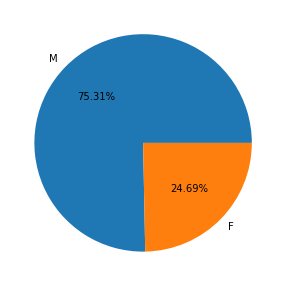

In [18]:
plt.figure(figsize=(10,5))
counts=train_data['Gender'].value_counts()
plt.pie(counts,labels=counts.index,autopct='%.2f%%')
plt.show()

- Maximum customers are in the Age group 26-35 
- City B has the highest customers
- Unmarried customers have more purchase than married customers
- Male customers have more transactions than female customers
- Products 1,5,8 in product_category_1 have the highest frequency
- Purchase does not have a normal distribution

Text(0.5, 1.0, 'Purchase Distribution')

<Figure size 432x288 with 0 Axes>

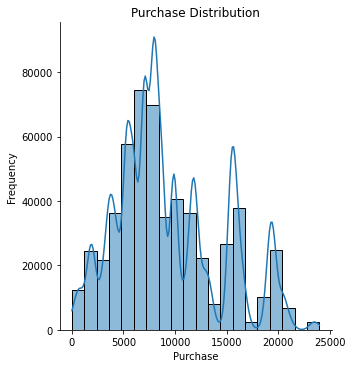

In [19]:
#Checking the distribution for purchase in train dataset
plt.figure()
sns.displot(data=train_data,x=train_data['Purchase'],bins=20,kde=True)
plt.ylabel('Frequency')
plt.title('Purchase Distribution')
#plt.show()

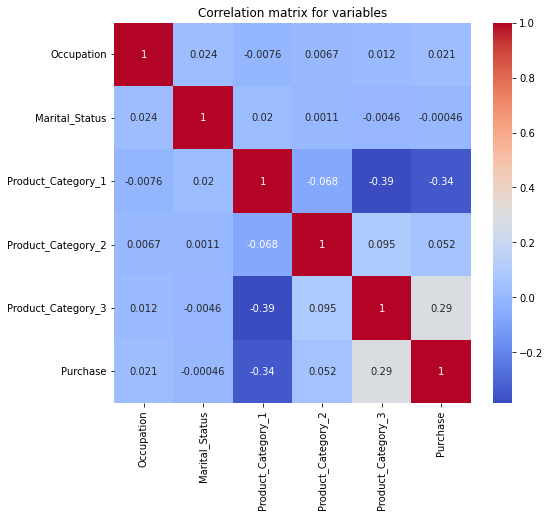

In [20]:
#Checking the Correlation
plt.figure(figsize=(8,7))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation matrix for variables')
plt.show()


# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()
train_data['Gender'] = lable_encoder.fit_transform(train_data['Gender'])
train_data['Age'] = lable_encoder.fit_transform(train_data['Age'])
train_data['City_Category'] = lable_encoder.fit_transform(train_data['City_Category'])
train_data['Stay_In_Current_City_Years'] = train_data['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")
train_data.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4,0,8,0,0,7969


In [22]:
test_data['Gender'] = lable_encoder.fit_transform(test_data['Gender'])
test_data['Age'] = lable_encoder.fit_transform(test_data['Age'])
test_data['City_Category'] = lable_encoder.fit_transform(test_data['City_Category'])
test_data['Stay_In_Current_City_Years'] = test_data['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")
test_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11,0
1,1,2,17,2,0,0,3,5,0
2,0,3,1,1,4,1,5,14,0
3,0,3,1,1,4,1,4,9,0
4,0,2,1,2,1,0,4,5,12


Splitting the data to get the train and validation datasets

In [23]:
X = train_data.drop("Purchase",axis=1)
y = train_data['Purchase']


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
Xtrain_scale=s.fit_transform(X_train)
Xtest_scale=s.fit_transform(X_test)

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
lr=LinearRegression()
lr.fit(Xtrain_scale,y_train)

LinearRegression()

In [27]:
y_predict=lr.predict(Xtest_scale)

In [28]:
print('R2 Score for Linear Regression:',r2_score(y_test,y_predict))
print('MAE for Linear Regression:',mean_absolute_error(y_test,y_predict))
print('MSE for Linear Regression:',mean_squared_error(y_test,y_predict))
print('RMSE for Linear Regression:',sqrt(mean_squared_error(y_test, y_predict)))


R2 Score for Linear Regression: 0.1519054931683984
MAE for Linear Regression: 3532.4324169099723
MSE for Linear Regression: 21398457.60871852
RMSE for Linear Regression: 4625.846691008957


# Decision Tree Regressor


In [29]:
from sklearn.tree import DecisionTreeRegressor
decision_tree= DecisionTreeRegressor(random_state = 0)

In [30]:
#fitting the decision tree model to the training set
decision_tree.fit(Xtrain_scale,y_train)

DecisionTreeRegressor(random_state=0)

In [31]:
#Prediction using test set
decision_tree_ypred=decision_tree.predict(Xtest_scale)

In [32]:
print('R2 Score for Decision Tree Regressor:',r2_score(y_test,decision_tree_ypred))
print('MAE for Decision Tree Regressor:',mean_absolute_error(y_test,decision_tree_ypred))
print('MSE for Decision Tree Regressor:',mean_squared_error(y_test,decision_tree_ypred))
print('RMSE for Decision Tree Regressor:',sqrt(mean_squared_error(y_test, decision_tree_ypred)))


R2 Score for Decision Tree Regressor: 0.5542598192172079
MAE for Decision Tree Regressor: 2367.7914408561337
MSE for Decision Tree Regressor: 11246567.789498735
RMSE for Decision Tree Regressor: 3353.5902834870476


# Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [34]:
rf.fit(Xtrain_scale, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [35]:
rf_pred = rf.predict(Xtest_scale)

In [36]:
print('R2 Score for Random Forest Regressor:',r2_score(y_test,rf_pred))
print('MAE for Random Forest Regressor:',mean_absolute_error(y_test,rf_pred))
print('MSE for Random Forest Regressor:',mean_squared_error(y_test,rf_pred))
print('RMSE for Random Forest Regressor:',sqrt(mean_squared_error(y_test, rf_pred)))


R2 Score for Random Forest Regressor: 0.6190047550149189
MAE for Random Forest Regressor: 2250.550573126947
MSE for Random Forest Regressor: 9612974.183023913
RMSE for Random Forest Regressor: 3100.479669829156


# XGBoost

In [43]:
from xgboost import XGBRFRegressor
xgb=XGBRFRegressor()

params={
    'max_depth':[3,4,5,6,7,8],
    'n_estimators':np.arange(50,500,100),
    'learning_rate':[.05,.1,.2,.5,.8,.9],
    'subsample': np.linspace(.3,.9,10),
    'min_child_weight':[2,3,4,5],
    'colsample_bytree':[.3,.4,.5,.6,.7,.8,.9],
    'gamma':[.2,.3,.4,.5,.6,.7,.8,.9]
}

In [47]:
xgb_cv=RandomizedSearchCV(xgb,param_distributions=params,cv=5,n_iter=5,n_jobs=3)
xgb_cv.fit(Xtrain_scale,y_train)
pram_list=rncv_xgb.best_params_
best_esti=rncv_xgb.best_estimator_
y_predict_xg=xgb_cv.predict(Xtest_scale)

In [48]:
print('R2 Score for XGBoost:',r2_score(y_test,y_predict_xg))
print('MAE for XGBoost:',mean_absolute_error(y_test,y_predict_xg))
print('MSE for XGBoost:',mean_squared_error(y_test,y_predict_xg))
print('RMSE for XGBoost:',sqrt(mean_squared_error(y_test, y_predict_xg)))


R2 Score for XGBoost: 0.5656720843948576
MAE for XGBoost: 2525.982062199541
MSE for XGBoost: 10958622.435936999
RMSE for XGBoost: 3310.3810106900078


As we can see the XGBoost model has the lowest RMSE and highest R2 Score, hence it is the best model.